# atan vs atan2

탄젠트는 다음 항등식이 성립한다.

$$\tan{\theta} = \frac{\sin{\theta}}{\cos{\theta}} = \frac{y}{x}$$

따라서 탄젠트는 각의 윗변이 놓이는 사분면에 따라 부호가 정해진다.

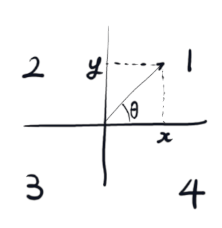

| 분면Quadrant | $\theta_{min}$  | $\theta_{max}$  | $\sin$ | $\cos$ | $\tan$ |
| ------------ | ---- | ---- | --- | --- | --- |
| $1$          | $0$    | $0.5π$ | +   | +   | +   |
| $2$          | $0.5π$ | $π$    | +   | -   | -   |
| $3$          | $π$    | $1.5π$ | -   | -   | +   |
| $4$          | $1.5π$ | $2π$   | -   | +   | -   |

탄젠트값만 알고 있어서는 각이 어느 분면에 위치하는지 정확하게 알 수 없다.

- $\tan{\theta}>0$일 때 $\theta$는 1, 3분면의 각 중 하나였을 것이다.
- $\tan{\theta}<0$일 때 $\theta$는 2, 4분면의 각 중 하나였을 것이다.

아크탄젠트($\text{atan}$)는 $\theta$가 원래는 2, 4분면의 각이었었더라도 무조건 상응하는 1, 4분면의 각만을 반환한다.

$$\text{atan}(\tan{\theta}) : \mathbb{R}\mapsto [-\frac{\pi}{2}, \frac{\pi}{2}]$$

| 분면Quadrant | atan      |
| ------------ | ---------- |
| $1, 3$          | 0 ~ 0.5π   |
| $2, 4$          | -0.5π ~ 0  |

$\text{atan2}$는 임의의 좌표 $y$, $x$의 값을 따로따로 입력 받아 모든 사분면에서의 각도를 반환한다.

$$\text{atan2}(y, x) : \mathbb{R^2}\mapsto (-\pi, \pi]$$

| 분면Quadrant | atan2      |
| ------------ | ---------- |
| $1$          | 0 ~ 0.5π   |
| $2$          | 0.5π ~ π   |
| $3$          | -π ~ -0.5π |
| $4$          | -0.5π ~ 0  |



다음 코드는 $(x, \text{atan}(x))$의 그래프를 그린다.

0.0
1.5707963267948966
-1.5707963267948966


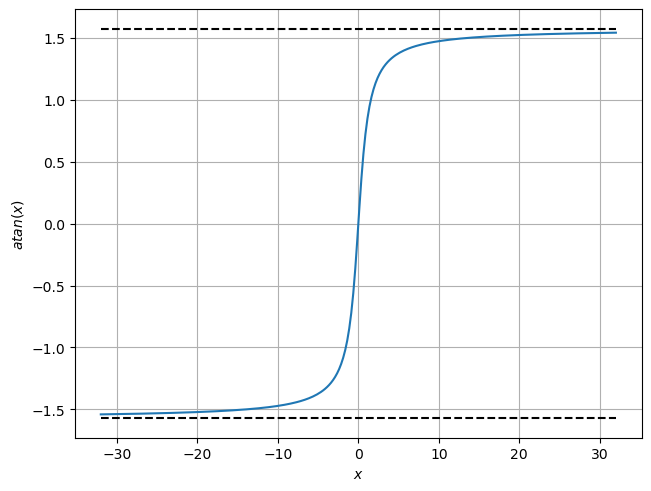

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import math

xmin = -32
xmax = 32
ymin = -32
ymax = 32
xx = np.linspace(xmin, xmax, 256)
yy = np.arctan(xx)
fig, ax = plt.subplots(layout="constrained")
ax.plot(xx, yy)
ax.plot([xmin, xmax], [math.pi*0.5, math.pi*0.5], 'k--')
ax.plot([xmin, xmax], [-math.pi*0.5, -math.pi*0.5], 'k--')
ax.grid(True)
ax.set_ylabel('$atan(x)$')
ax.set_xlabel('$x$')
print(np.arctan(0))
print(np.arctan(math.inf))
print(np.arctan(-math.inf))

이로써 $\text{atan}(x)$ 함수에 대해 다음 사실을 알 수 있다:
- $x$가 $0$일 때 atan함수의 값도 $0$이다.
- $x$가 증가하면 atan함수는 90도에 근접한다.
  $$\lim_{x\to\infin}\text{atan}(x)=\frac{\pi}{2}$$
- $x$가 감소하면 atan함수는 -90도에 근접한다.
  $$\lim_{x\to-\infin}\text{atan}(x)=-\frac{\pi}{2}$$

다음 코드는 그래프 $(x, y, \text{atan}(y/x))$의 컨투어 맵을 그린다.

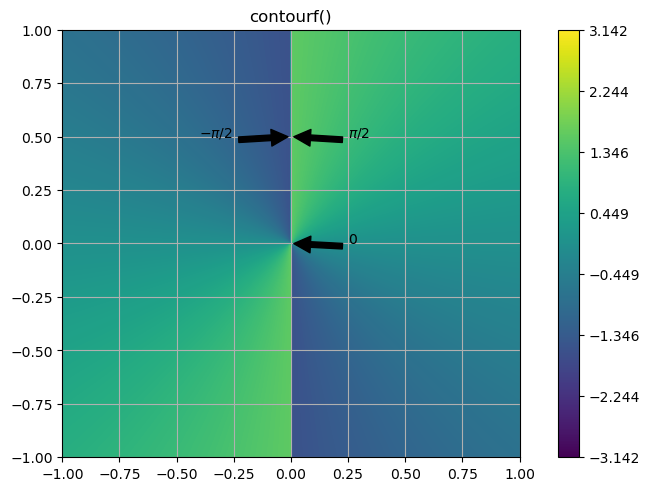

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import math

xmin = -1
xmax = 1
ymin = -1
ymax = 1
xx = np.linspace(xmin, xmax, 256)
yy = np.linspace(ymin, ymax, 256)
xx, yy = np.meshgrid(xx, yy)
zz = np.arctan(yy/xx)
fig, ax = plt.subplots(layout="constrained")
co = ax.contourf(xx, yy, zz, levels=np.linspace(-math.pi, math.pi, 256))
fig.colorbar(co, ax=ax, ticks = np.linspace(-math.pi, math.pi, 8))
ax.set_title('contourf()')
ax.annotate("0", 
            (0,0),
            xytext=(0.25, 0),
            arrowprops=dict(facecolor='black', shrink=0.05)
)
ax.annotate("$\pi / 2$", 
            (0,0.5),
            xytext=(0.25, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05)
)
ax.annotate("$-\pi / 2$", 
            (0,0.5),
            xytext=(-0.40, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05)
)
ax.grid(True)

- 마치 기함수같은 형태가 보이며, $(x,y)$가 $x=0$근처에서 아주 조금만 움직여도 값이 정반대로 바뀌어 라운딩 에러가 있을 경우 크게 결과가 바뀔 위험이 있다.

다음 코드는 $(x, y, \text{atan2}(y, x))$함수의 컨투어맵을 그린다.

0.0
3.141592653589793
-3.1415926535897922


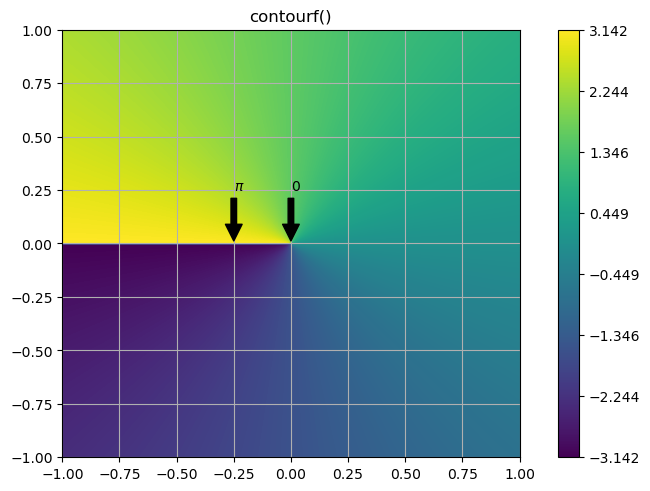

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import math

xmin = -1
xmax = 1
ymin = -1
ymax = 1
xx = np.linspace(xmin, xmax, 256)
yy = np.linspace(ymin, ymax, 256)
xx, yy = np.meshgrid(xx, yy)
zz = np.arctan2(yy, xx)
fig, ax = plt.subplots(layout="constrained")
co = ax.contourf(xx, yy, zz, levels=np.linspace(-math.pi, math.pi, 256))
fig.colorbar(co, ax=ax, ticks = np.linspace(-math.pi, math.pi, 8))
ax.set_title('contourf()')
ax.grid(True)
ax.annotate("$\pi$", 
            (-0.25, 0), 
            xytext=(-0.25, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05)
)
ax.annotate("0", 
            (0,0),
            xytext=(0, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05)
)
print(np.arctan2(0, 0)) # it gracefully returns 0
print(np.arctan2(0, -0.5)) # boundary(pi) included
print(np.arctan2(-1e-15, -1)) # boudnary(-pi) not included

- $atan2(y, x)$는 $x=0$에서는 이론적으로 각을 구할 수 없어야 정상이지만, ($\tan{90\degree}$가 정의되지 않으므로) 90도를 반환하면, 함수가 자연스럽게 이어지므로 90도를 반환한다.
- $atan2(0, 0)$는 각도가 정의될 수 없는 곳이지만, 에러를 발생시키는 대신 $0$을 반환한다.
- $atan2(y, x)$는 $y=0, x<0$ 근처에서 값이 한 번 뒤집힌다. 이 때도 라운딩 에러에 따라 $\theta$의 부호가 반대가 될 가능성이 있지만, $-\pi$와 $\pi$는 사실상 동일한 각도이므로 큰 문제는 아니다.